# 데이터 불러오기 및 라벨링

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

2024-05-07 12:00:37.428192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 12:00:37.650893: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


4 Physical GPUs, 4 Logical GPUs


2024-05-07 12:00:47.817647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 12:00:49.520084: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14825 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3b:00.0, compute capability: 7.5
2024-05-07 12:00:49.521114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14825 MB memory:  -> device: 1, name: Quadro RTX 5000, pci bus id: 0000:5e:00.0, compute capability: 7.5
2024-05-07 12:00:49.522062: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:local

### step1: 질병이 있음/없음만 구분

In [2]:
import os

# 데이터셋의 루트 디렉토리
dataset_directory = '/home/jeonk636/ear_classification/eardrumDs'

# 클래스 이름 및 라벨을 매핑하기 위한 딕셔너리 생성
# normal:0, abnormal: 1
label_map = {
    'Aom': 1,
    'Chornic': 1,
    'Earwax': 1,
    'Normal': 0,
    'OtitExterna': 1,
    'tympanoskleros': 1
}

# 이미지 파일 경로 및 라벨을 저장할 리스트
image_paths = []
image_labels = []

# 제외 폴더
exclude_folders = {'Earventulation', 'Foreign', 'PseduoMembran'}

# 각 폴더에 대해 이미지 파일 경로 및 해당 라벨을 리스트에 추가
for label_folder in os.listdir(dataset_directory):
    if label_folder in exclude_folders:  # 이 폴더는 건너뛴다.
        continue
    folder_path = os.path.join(dataset_directory, label_folder)
    
    for image_filename in os.listdir(folder_path):
        # 폴더 내 파일이 실제 파일인지 확인하고 '.ipynb_checkpoints' 폴더를 건너뛴다.
        full_path = os.path.join(folder_path, image_filename)
        if os.path.isfile(full_path) and '.ipynb_checkpoints' not in full_path:
            image_paths.append(full_path)
            image_labels.append(label_map[label_folder])


In [3]:
image_paths[0:5]

['/home/jeonk636/ear_classification/eardrumDs/Aom/aom_1.tiff',
 '/home/jeonk636/ear_classification/eardrumDs/Aom/aom_10.tiff',
 '/home/jeonk636/ear_classification/eardrumDs/Aom/aom_100.tiff',
 '/home/jeonk636/ear_classification/eardrumDs/Aom/aom_101.tiff',
 '/home/jeonk636/ear_classification/eardrumDs/Aom/aom_102.tiff']

In [4]:
print(image_labels[0:50])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [5]:
# 라벨 0과 라벨 1의 개수를 계산.
label_0_count = image_labels.count(0)
label_1_count = image_labels.count(1)

(label_0_count, label_1_count)

(534, 391)

Aom_cnt = 119  
Chornic_cnt = 62  
Earwax_cnt = 140  
Normal_cnt = 534  
OtitExterna_cnt = 41  
tympanoskleros_cnt = 28  

# Split the Dataset 6 : 2 : 2 

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

# 이미지 경로와 라벨을 Numpy 배열로 변환
image_paths = np.array(image_paths)
image_labels = np.array(image_labels)

# 전체 데이터를 훈련+검증 세트와 테스트 세트로 분할
x_train_all, x_test, y_train_all, y_test = train_test_split(
    image_paths, image_labels, stratify=image_labels, test_size=0.2, random_state=42)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
x_train, x_val, y_train, y_val = train_test_split(
    x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [7]:
# 결과 출력
print("Train set:", len(x_train))
print("Validation set:", len(x_val))
print("Test set:", len(x_test))

Train set: 592
Validation set: 148
Test set: 185


In [8]:
print("Normal in Train set:", np.count_nonzero(y_train == 0))
print("Abnormal in Train set:", np.count_nonzero(y_train == 1))

Normal in Train set: 342
Abnormal in Train set: 250


In [9]:
print("image_paths shape:",image_paths.shape)
print("image_labels shape:",image_labels.shape)

image_paths shape: (925,)
image_labels shape: (925,)


# train dataset을 Augmentation

### 목표: 정상 이미지 1000장, 비정상 이미지 1000장

#### A. 여러 종류의 증강함수를 만들기   
##### (GAN, Diffusion, Few-shot learning은 나중에 적용)

### 1. Spatial-Level Transforms

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import random

In [11]:
def flip_H(image):
    return tf.image.flip_left_right(image)

def flip_V(image):
    return tf.image.flip_up_down(image)

def rotate(image):
    # k = random.randint(1, 3)
    # rotated = tf.image.rot90(image, k)
    angle = random.uniform(0, 360)
    rotated = tf.image.rot90(image, k=int(angle // 90))
    return rotated

def crop(image):
    cropped = tf.image.central_crop(image, central_fraction=0.5)
    return cropped

In [14]:
def load_and_preprocess_image(path, target_size=(250, 250)):
    # 이미지를 RGB로 변환하여 로드
    image = Image.open(path).convert('RGB')
    image = image.resize(target_size)  # 목표 크기로 리사이징
    image = np.array(image)  # 이미지를 numpy 배열로 변환
    image = tf.convert_to_tensor(image, dtype=tf.float32) / 255.0  # 텐서로 변환하고 정규화
    return image
    
# 이미지 경로로부터 이미지를 로드
ex_path = x_train_all[50]  # 예시 이미지 경로
image = load_and_preprocess_image(ex_path)

Spatial_aug = {
    'flip_H': flip_H(image),
    'flip_V': flip_V(image),
    'rotate': rotate(image)
    #'crop': crop(image)
}

# 이미지를 시각화하기 위한 함수
def visualize_Spatial(image, Spatial_aug):
    fig, axes = plt.subplots(1, len(Spatial_aug) + 1, figsize=(20, 10))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    for i, (augmentation_name, augmented_image) in enumerate(Spatial_aug.items(), 1):
        axes[i].imshow(augmented_image)
        axes[i].set_title(augmentation_name)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

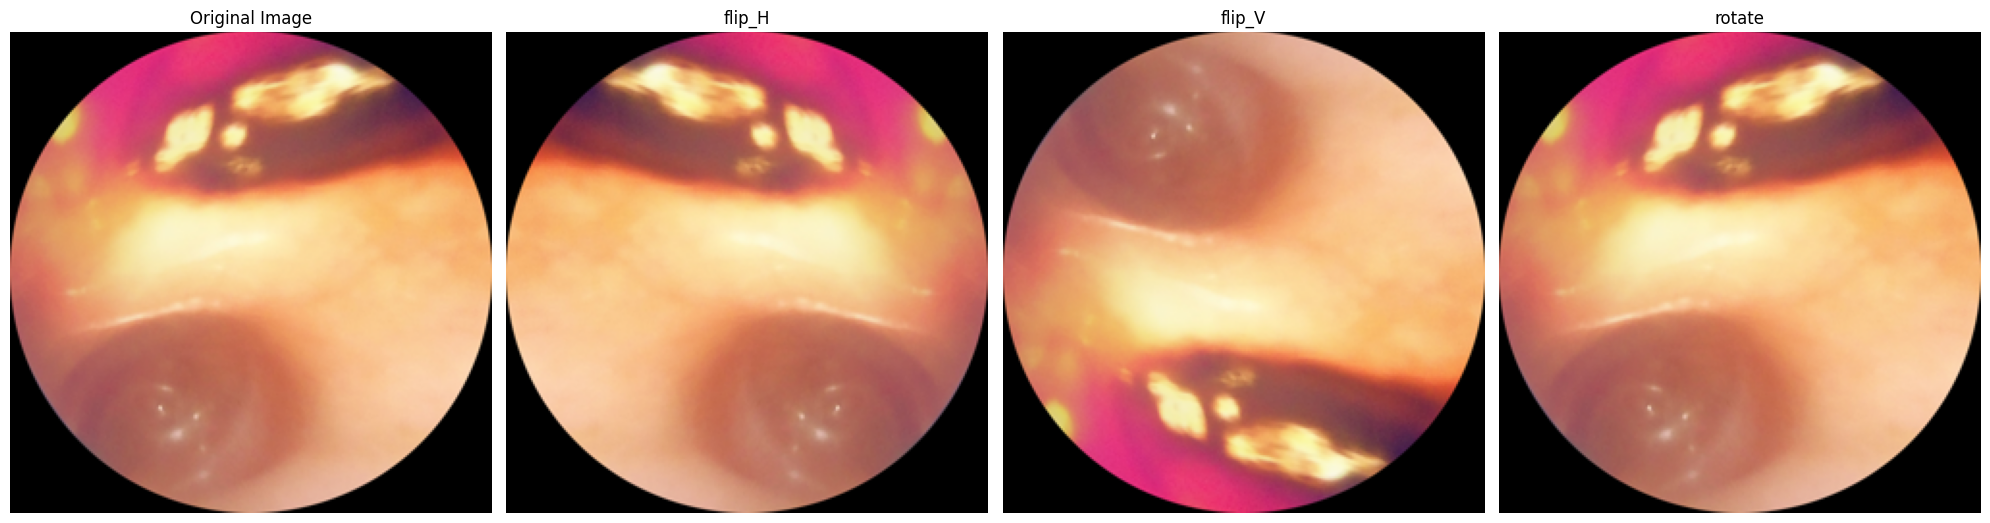

In [15]:
visualize_Spatial(image, Spatial_aug)

### 2.Pixel-Level Transforms

In [16]:
def CLAHE(image):
    image = (image.numpy() * 255).astype(np.uint8)
    # RGB 채널을 BGR로 변경
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # 각 채널에 CLAHE 적용
    channels = cv2.split(image)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8)) #2.0
    clahed_channels = [clahe.apply(c) for c in channels]
    clahed_image = cv2.merge(clahed_channels)
    # 다시 RGB 채널로 변경
    clahed_image = cv2.cvtColor(clahed_image, cv2.COLOR_BGR2RGB)
    # 이미지를 [0, 1] 범위로 정규화
    clahed_image = clahed_image / 255.0
    return clahed_image
    
def Hue(image):
    # hue_img = tf.image.adjust_hue(image, delta=0.1)
    # hue_img = tf.image.adjust_saturation(hue_img, saturation_factor=1)
    # return hue_img
    delta = random.uniform(-0.5, 0.5)
    return tf.image.adjust_hue(image, delta=delta)

def RandomContrast(image):
    # contrast_image = tf.image.random_contrast(image, lower=1.0, upper=3.0)
    # contrast_image = tf.clip_by_value(contrast_image, 0.0, 1.0)  # 클리핑
    # return contrast_image
    lower, upper = 0.5, 2.0  # 대비 범위 변경
    return tf.image.random_contrast(image, lower=lower, upper=upper)

def RandomGamma(image):
    # gamma_img = tf.image.adjust_gamma(image, gamma=0.5)
    # return gamma_img
    gamma = random.uniform(0.2, 2.0)
    return tf.image.adjust_gamma(image, gamma=gamma)

def RandomBrightness(image):
    bright_image = tf.image.random_brightness(image, max_delta=0.3)
    bright_image = tf.clip_by_value(bright_image, 0.0, 1.0)  # 클리핑
    return bright_image

def Blur(image):
    image = image.numpy()
    # blur_img = cv2.blur(image, (5, 5))
    # return blur_img
    kernel_size = random.choice([(5, 5), (7, 7), (9, 9), (13,13)])
    return cv2.blur(image, kernel_size)

def gray(image):
    # ToGray
    togray_img = tf.image.rgb_to_grayscale(image)
    return togray_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


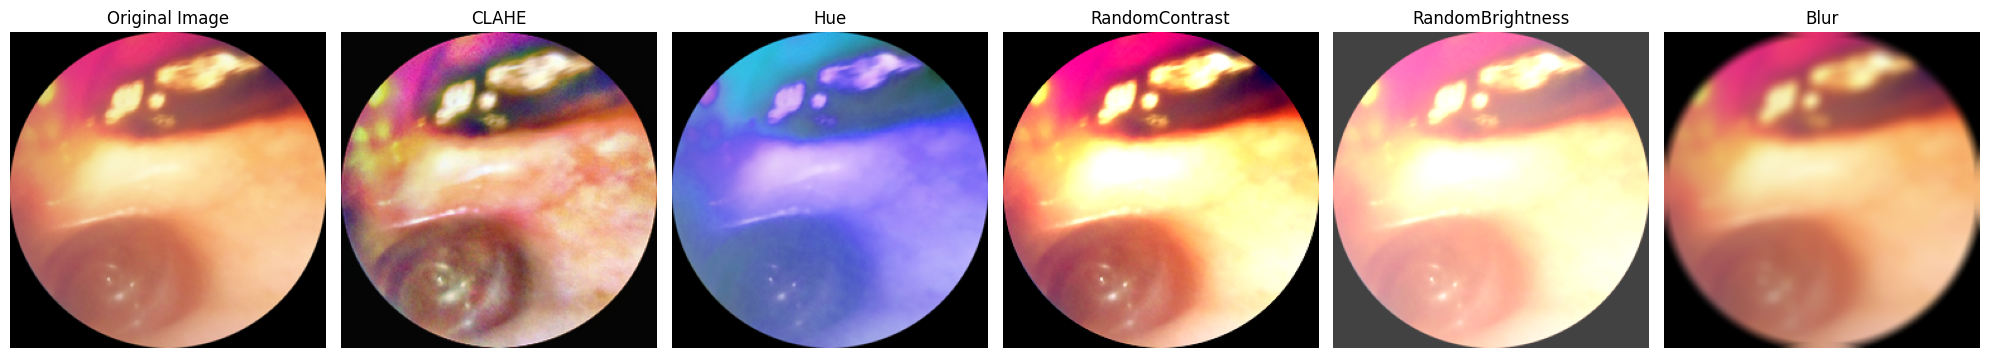

In [19]:
# 시각화를 위한 함수
def visualize_augmentations(image, augmentations):
    fig, axes = plt.subplots(1, len(augmentations) + 1, figsize=(20, 10))
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    for i, (augmentation_name, augmented_image) in enumerate(augmentations.items(), 1):
        axes[i].imshow(augmented_image)
        axes[i].set_title(augmentation_name)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# 각 증강 기법을 적용.
augmentations = {
    'CLAHE': CLAHE(image),
    #'Hue': Hue(image),
    'RandomContrast': RandomContrast(image),
    #'RandomGamma': RandomGamma(image),
    'RandomBrightness': RandomBrightness(image),
    'Blur': Blur(image)
    #'gray': gray(image)
}

# 시각화 실행
visualize_augmentations(image, augmentations)

In [21]:
normal_indices = [i for i, label in enumerate(y_train) if label == 0] #정상이미지와 라벨 불러오기
abnormal_indices = [j for j, label in enumerate(y_train) if label == 1] #비정상이미지와 라벨 불러오기

#selected_normal = random.sample(normal_indices, 10) #그 중 n장을 랜덤으로 선택
#selected_abnormal = random.sample(abnormal_indices, 10)

selected_normal_images = [(x_train[i]) for i in normal_indices] 
selected_normal_indexs = [(y_train[i]) for i in normal_indices]
selected_abnormal_images = [(x_train[j]) for j in abnormal_indices]
selected_abnormal_indexs = [(y_train[j]) for j in abnormal_indices]

In [22]:
print("선택된 정상 고막 이미지 경로 및 라벨:")
print(selected_normal_images[:3])
print(selected_normal_indexs[:3])
print(len(selected_normal_images), len(selected_normal_indexs))

print("선택된 비정상 고막 이미지 경로 및 라벨:")
print(selected_abnormal_images[:3])
print(selected_abnormal_indexs[:3])
print(len(selected_abnormal_images), len(selected_abnormal_indexs))

선택된 정상 고막 이미지 경로 및 라벨:
['/home/jeonk636/ear_classification/eardrumDs/Normal/normal_405.tiff', '/home/jeonk636/ear_classification/eardrumDs/Normal/normal_514.tiff', '/home/jeonk636/ear_classification/eardrumDs/Normal/normal_407.tiff']
[0, 0, 0]
342 342
선택된 비정상 고막 이미지 경로 및 라벨:
['/home/jeonk636/ear_classification/eardrumDs/Aom/aom_35.tiff', '/home/jeonk636/ear_classification/eardrumDs/Earwax/buson_124.tiff', '/home/jeonk636/ear_classification/eardrumDs/OtitExterna/otitexterna_12.tiff']
[1, 1, 1]
250 250


## 증강함수 적용

In [25]:
aug_func_spatial = {
    'flip_H': flip_H,
    'flip_V': flip_V,
    'rotate': rotate
    #'crop': crop
}

aug_ratio_spatial = {
    'flip_H': 0.3,
    'flip_V': 0.3,
    'rotate': 0.4
    #'crop': 0.25
}

aug_func_pixel = {
    'CLAHE': CLAHE,
    #'Hue': Hue,
    'RandomContrast': RandomContrast,
    #'RandomGamma': RandomGamma,
    'RandomBrightness': RandomBrightness,
    'Blur': Blur
    #'gray': gray
}

aug_ratio_pixel = {
    'CLAHE': 0.2,
    #'Hue': 0.1,
    'RandomContrast': 0.2,
    #'RandomGamma': 0.1,
    'RandomBrightness': 0.3,
    'Blur': 0.3
    #'gray': 0.1
}

def apply_aug_spatial(images, augmentations, ratios):
    augmented_images = []
    func_names = list(augmentations.keys())  # 사전의 키를 리스트로 변환
    probabilities = [ratios[name] for name in func_names]  # 확률 추출
    aug_choice = np.random.choice(func_names, p=probabilities)  # 확률에 따라 선택
    augmented_image = aug_func_spatial[aug_choice](images)  # 증강 함수 적용
    augmented_images.append(augmented_image)
    return augmented_images

def apply_aug_pixel(images, augmentations, ratios):
    augmented_images = []
    func_names = list(augmentations.keys()) 
    probabilities = [ratios[name] for name in func_names]
    aug_choice = np.random.choice(func_names, p=probabilities) 
    augmented_image = aug_func_pixel[aug_choice](images)
    augmented_images.append(augmented_image)
    return augmented_images


### Normal 이미지에 적용

In [26]:
random_select_normal = random.sample(selected_normal_images, 329)

aug_normal = []
for image in random_select_normal:
    tensor = load_and_preprocess_image(image)  # RGB를 array로 변환
    aug_normal.extend(apply_aug_spatial(tensor, aug_func_spatial, aug_ratio_spatial))
    aug_normal.extend(apply_aug_pixel(tensor, aug_func_pixel, aug_ratio_pixel))

In [27]:
print(len(aug_normal))

658


In [28]:
aug_normal_label = [0]*658
print(len(aug_normal_label))

658


### Abnormal 이미지에 적용

In [29]:
random_select_abnormal = random.choices(selected_abnormal_images, k=375)

aug_abnormal = []
for image in random_select_abnormal:
    tensor = load_and_preprocess_image(image)
    aug_abnormal.extend(apply_aug_spatial(tensor, aug_func_spatial, aug_ratio_spatial))
    aug_abnormal.extend(apply_aug_pixel(tensor, aug_func_pixel, aug_ratio_pixel))

In [30]:
print(len(aug_abnormal))

750


In [31]:
aug_abnormal_label = [1]*750
print(len(aug_abnormal_label))

750


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


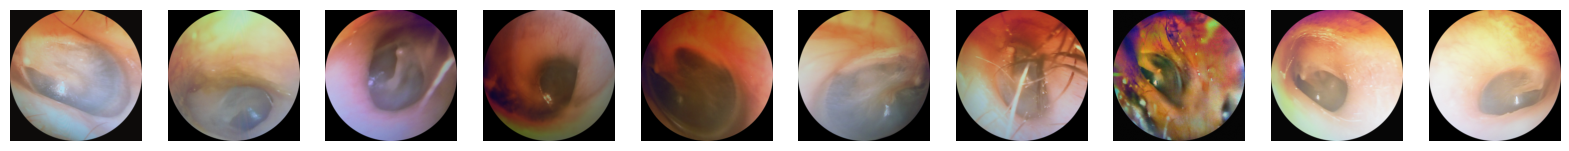

In [32]:
def plot_images(images):
    plt.figure(figsize=(20, 4))
    for i, image in enumerate(images[:10]):
        plt.subplot(1, 10, i + 1)
        plt.imshow(image)
        plt.axis('off')
    plt.show()

im = random.sample(aug_normal, 10)
# 시각화 실행
plot_images(im)

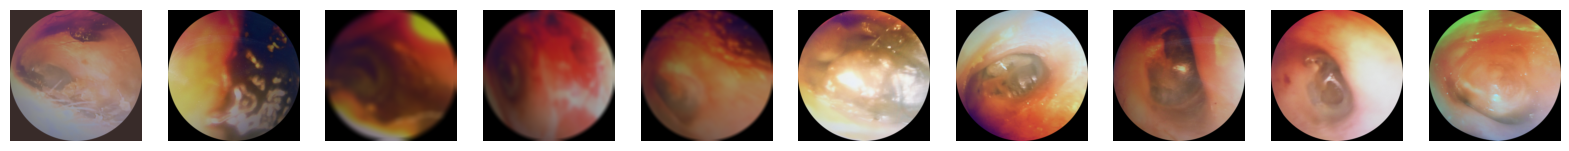

In [33]:
# 시각화 실행
im_ab = random.sample(aug_abnormal, 10)
plot_images(im_ab)

# 증강함수를 적용한 후 CNN

In [36]:
x_train = [load_and_preprocess_image(path) for path in x_train]
x_val = [load_and_preprocess_image(path) for path in x_val]
x_test = [load_and_preprocess_image(path) for path in x_test]

In [37]:
# NumPy 배열로 변환 (필요한 경우)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

aug_normal_label = np.array(aug_normal_label)
aug_abnormal_label = np.array(aug_abnormal_label)

def resize_image(image, target_size=(250, 250)):
    return tf.image.resize(image, target_size)
    
# def ensure_rgb(image):
#     if image.shape[-1] == 1:  # 이미지가 그레이스케일이라면
#         image = tf.image.grayscale_to_rgb(image)  # RGB로 변환
#     return image

aug_normal_resized = [resize_image(img) for img in aug_normal]
aug_abnormal_resized = [resize_image(img) for img in aug_abnormal]

x_train_resized = [resize_image(img) for img in x_train]

# aug_normal_resized2 = [ensure_rgb(img) for img in aug_normal_resized]
# aug_abnormal_resized2 = [ensure_rgb(img) for img in aug_abnormal_resized]

new_y_train = np.concatenate([y_train, aug_normal_label, aug_abnormal_label])

new_x_train = x_train_resized + aug_normal_resized + aug_abnormal_resized

print(len(new_x_train)) 
print(len(new_y_train))

2000
2000


In [38]:
# for img in x_test:
#     print(img.shape, img.dtype)

In [39]:
#기존 tf CNN에만 적용하는 코드
# new_x_train = tf.stack(new_x_train) 
# x_val = tf.stack(x_val)
# x_test = tf.stack(x_test)

In [40]:
# x_val_resized = [resize_image(img) for img in x_val]
# x_test_resized = [resize_image(img) for img in x_test]

# y_val = np.array(y_val)
# y_test = np.array(y_test)

# print(len(x_val_resized), len(y_val))
# print(len(x_test_resized), len(y_test))

In [41]:
print("new_x_train 길이:", len(new_x_train))
print("new_y_train 길이:", len(new_y_train))
print("x_val 길이:", len(x_val))
print("y_val 길이:", len(y_val))
print("x_test 길이:", len(x_test))
print("y_test 길이:", len(y_test))

new_x_train 길이: 2000
new_y_train 길이: 2000
x_val 길이: 148
y_val 길이: 148
x_test 길이: 185
y_test 길이: 185


In [43]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

logical_gpus = tf.config.experimental.list_logical_devices ('GPU')
strategy = tf.distribute.MirroredStrategy(logical_gpus)

num_classes = 2

# Define the model
with strategy.scope():
    # Load the EfficientNetB2 model
    base_model = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers on top
    #x = base_model.output
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 데이터를 TensorFlow Dataset으로 변환하여 메모리 관리 향상
train_dataset = tf.data.Dataset.from_tensor_slices((tf.stack(new_x_train), new_y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((tf.stack(x_val), y_val)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((tf.stack(x_test), y_test)).batch(32)

# Evaluate the model
history = model.fit(train_dataset, epochs=30, validation_data=val_dataset)
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


2024-05-07 12:54:15.124140: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_2"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_FLOAT
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 2000
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\024TensorSliceDataset:6"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 250
        }
        dim {
          size: 250
        }
        dim {
          size: 3
        }
      }
      shape {
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value {
    b: false
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  ar

Epoch 1/30
INFO:tensorflow:batch_all_reduce: 4 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 4 all-reduces with algorithm = nccl, num_packs = 1


2024-05-07 12:54:39.124615: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_1/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-05-07 12:54:42.631939: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2024-05-07 12:54:43.478719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2024-05-07 12:54:44.383384: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2024-05-07 12:54:44.690622: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2024-05-07 12:54:44.702537: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-07 12:54:44.706727: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are 

 3/63 [>.............................] - ETA: 2s - loss: 1.2815 - accuracy: 0.4479   

2024-05-07 12:54:47.562279: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


63/63 [==============================] - ETA: 0s - loss: 0.9512 - accuracy: 0.7120

2024-05-07 12:54:50.323060: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_2"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_FLOAT
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 148
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\024TensorSliceDataset:8"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 250
        }
        dim {
          size: 250
        }
        dim {
          size: 3
        }
      }
      shape {
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value {
    b: false
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  arg

63/63 [==============================] - 45s 219ms/step - loss: 0.9512 - accuracy: 0.7120 - val_loss: 3.2504 - val_accuracy: 0.4257
Epoch 2/30
63/63 [==============================] - 3s 50ms/step - loss: 1.0265 - accuracy: 0.5550 - val_loss: 1.4954 - val_accuracy: 0.4257
Epoch 3/30
63/63 [==============================] - 3s 50ms/step - loss: 0.9870 - accuracy: 0.3725 - val_loss: 0.6821 - val_accuracy: 0.5743
Epoch 4/30
63/63 [==============================] - 3s 51ms/step - loss: 0.7072 - accuracy: 0.5020 - val_loss: 0.6970 - val_accuracy: 0.4257
Epoch 5/30
63/63 [==============================] - 3s 51ms/step - loss: 0.6647 - accuracy: 0.5700 - val_loss: 1.3757 - val_accuracy: 0.4257
Epoch 6/30
63/63 [==============================] - 3s 51ms/step - loss: 0.8382 - accuracy: 0.3765 - val_loss: 0.6872 - val_accuracy: 0.5743
Epoch 7/30
63/63 [==============================] - 3s 51ms/step - loss: 0.7012 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5743
Epoch 8/30
63/63 [====

2024-05-07 12:56:49.507299: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_2"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_FLOAT
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 185
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\025TensorSliceDataset:10"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 250
        }
        dim {
          size: 250
        }
        dim {
          size: 3
        }
      }
      shape {
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value {
    b: false
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  ar

6/6 [==============================] - 2s 356ms/step - loss: 0.6920 - accuracy: 0.5784
Test accuracy: 0.5783783793449402


In [44]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 250, 250, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 250, 250, 3)  7          ['rescaling_2[0][0]']            
 )                                                                                                
                                                                                            

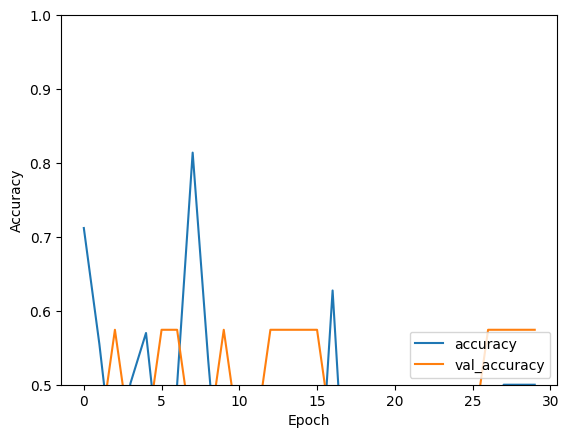

2024-05-07 12:58:42.488782: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:784] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_2"
op: "TensorSliceDataset"
input: "Placeholder/_0"
input: "Placeholder/_1"
attr {
  key: "Toutput_types"
  value {
    list {
      type: DT_FLOAT
      type: DT_INT64
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: 148
  }
}
attr {
  key: "is_files"
  value {
    b: false
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\027TensorSliceDataset:1425"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: 250
        }
        dim {
          size: 250
        }
        dim {
          size: 3
        }
      }
      shape {
      }
    }
  }
}
attr {
  key: "replicate_on_split"
  value {
    b: false
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  

5/5 - 1s - loss: 0.6920 - accuracy: 0.5743 - 585ms/epoch - 117ms/step
Test loss: 0.6920454502105713, Test accuracy: 0.5743243098258972


In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# x_val, y_val 데이터셋을 적절히 준비
val_dataset = tf.data.Dataset.from_tensor_slices((tf.stack(x_val), y_val)).batch(32)

# 모델을 평가합니다.
test_loss, test_acc = model.evaluate(val_dataset, verbose=2)
print(f'Test loss: {test_loss}, Test accuracy: {test_acc}')

#### 크기 250, spatial과 pixel 증강을 따로 적용, 다소 무난한 증강 적용

In [37]:
logical_gpus = tf.config.experimental.list_logical_devices ('GPU')
strategy = tf.distribute.MirroredStrategy(logical_gpus)
#with tf.device("/gpu:0"):

# Define the model
#with tf.device("/gpu:0"):
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2)
    ])

    # Compile the model
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

# Train the model
history = model.fit(new_x_train, new_y_train, epochs=30, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
Epoch 1/30
INFO:tensorflow:batch_all_reduce: 8 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:batch_all_reduce: 8 all-reduces with algorithm =

2024-05-06 00:12:39.273520: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2024-05-06 00:12:41.067110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2024-05-06 00:12:41.844713: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-06 00:12:41.848655: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2024-05-06 00:12:41.957610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2024-05-06 00:12:42.303121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8907
2024-05-06 00:12:4

 1/63 [..............................] - ETA: 12:35 - loss: 0.6923 - accuracy: 0.4688

2024-05-06 00:12:46.310380: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2024-05-06 00:12:46.436934: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


63/63 [==============================] - 17s 72ms/step - loss: 0.9912 - accuracy: 0.5940 - val_loss: 0.6544 - val_accuracy: 0.6689
Epoch 2/30
63/63 [==============================] - 3s 40ms/step - loss: 0.6218 - accuracy: 0.6650 - val_loss: 0.6122 - val_accuracy: 0.6486
Epoch 3/30
63/63 [==============================] - 2s 36ms/step - loss: 0.5923 - accuracy: 0.6760 - val_loss: 0.5950 - val_accuracy: 0.6757
Epoch 4/30
63/63 [==============================] - 2s 39ms/step - loss: 0.5861 - accuracy: 0.6925 - val_loss: 0.6019 - val_accuracy: 0.6554
Epoch 5/30
63/63 [==============================] - 2s 36ms/step - loss: 0.5658 - accuracy: 0.7110 - val_loss: 0.6082 - val_accuracy: 0.6622
Epoch 6/30
63/63 [==============================] - 2s 37ms/step - loss: 0.5552 - accuracy: 0.7185 - val_loss: 0.6099 - val_accuracy: 0.6892
Epoch 7/30
63/63 [==============================] - 2s 36ms/step - loss: 0.5204 - accuracy: 0.7360 - val_loss: 0.5810 - val_accuracy: 0.7162
Epoch 8/30
63/63 [=====

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 238144)            0         
                                                                 
 dense_2 (Dense)             (None, 64)               

5/5 - 0s - loss: 1.7769 - accuracy: 0.6959 - 308ms/epoch - 62ms/step


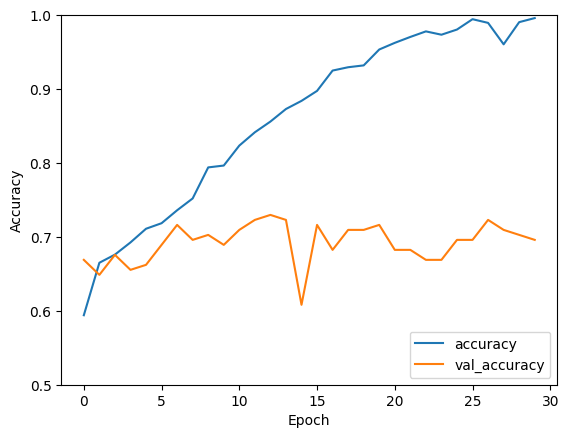

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_val,  y_val, verbose=2)

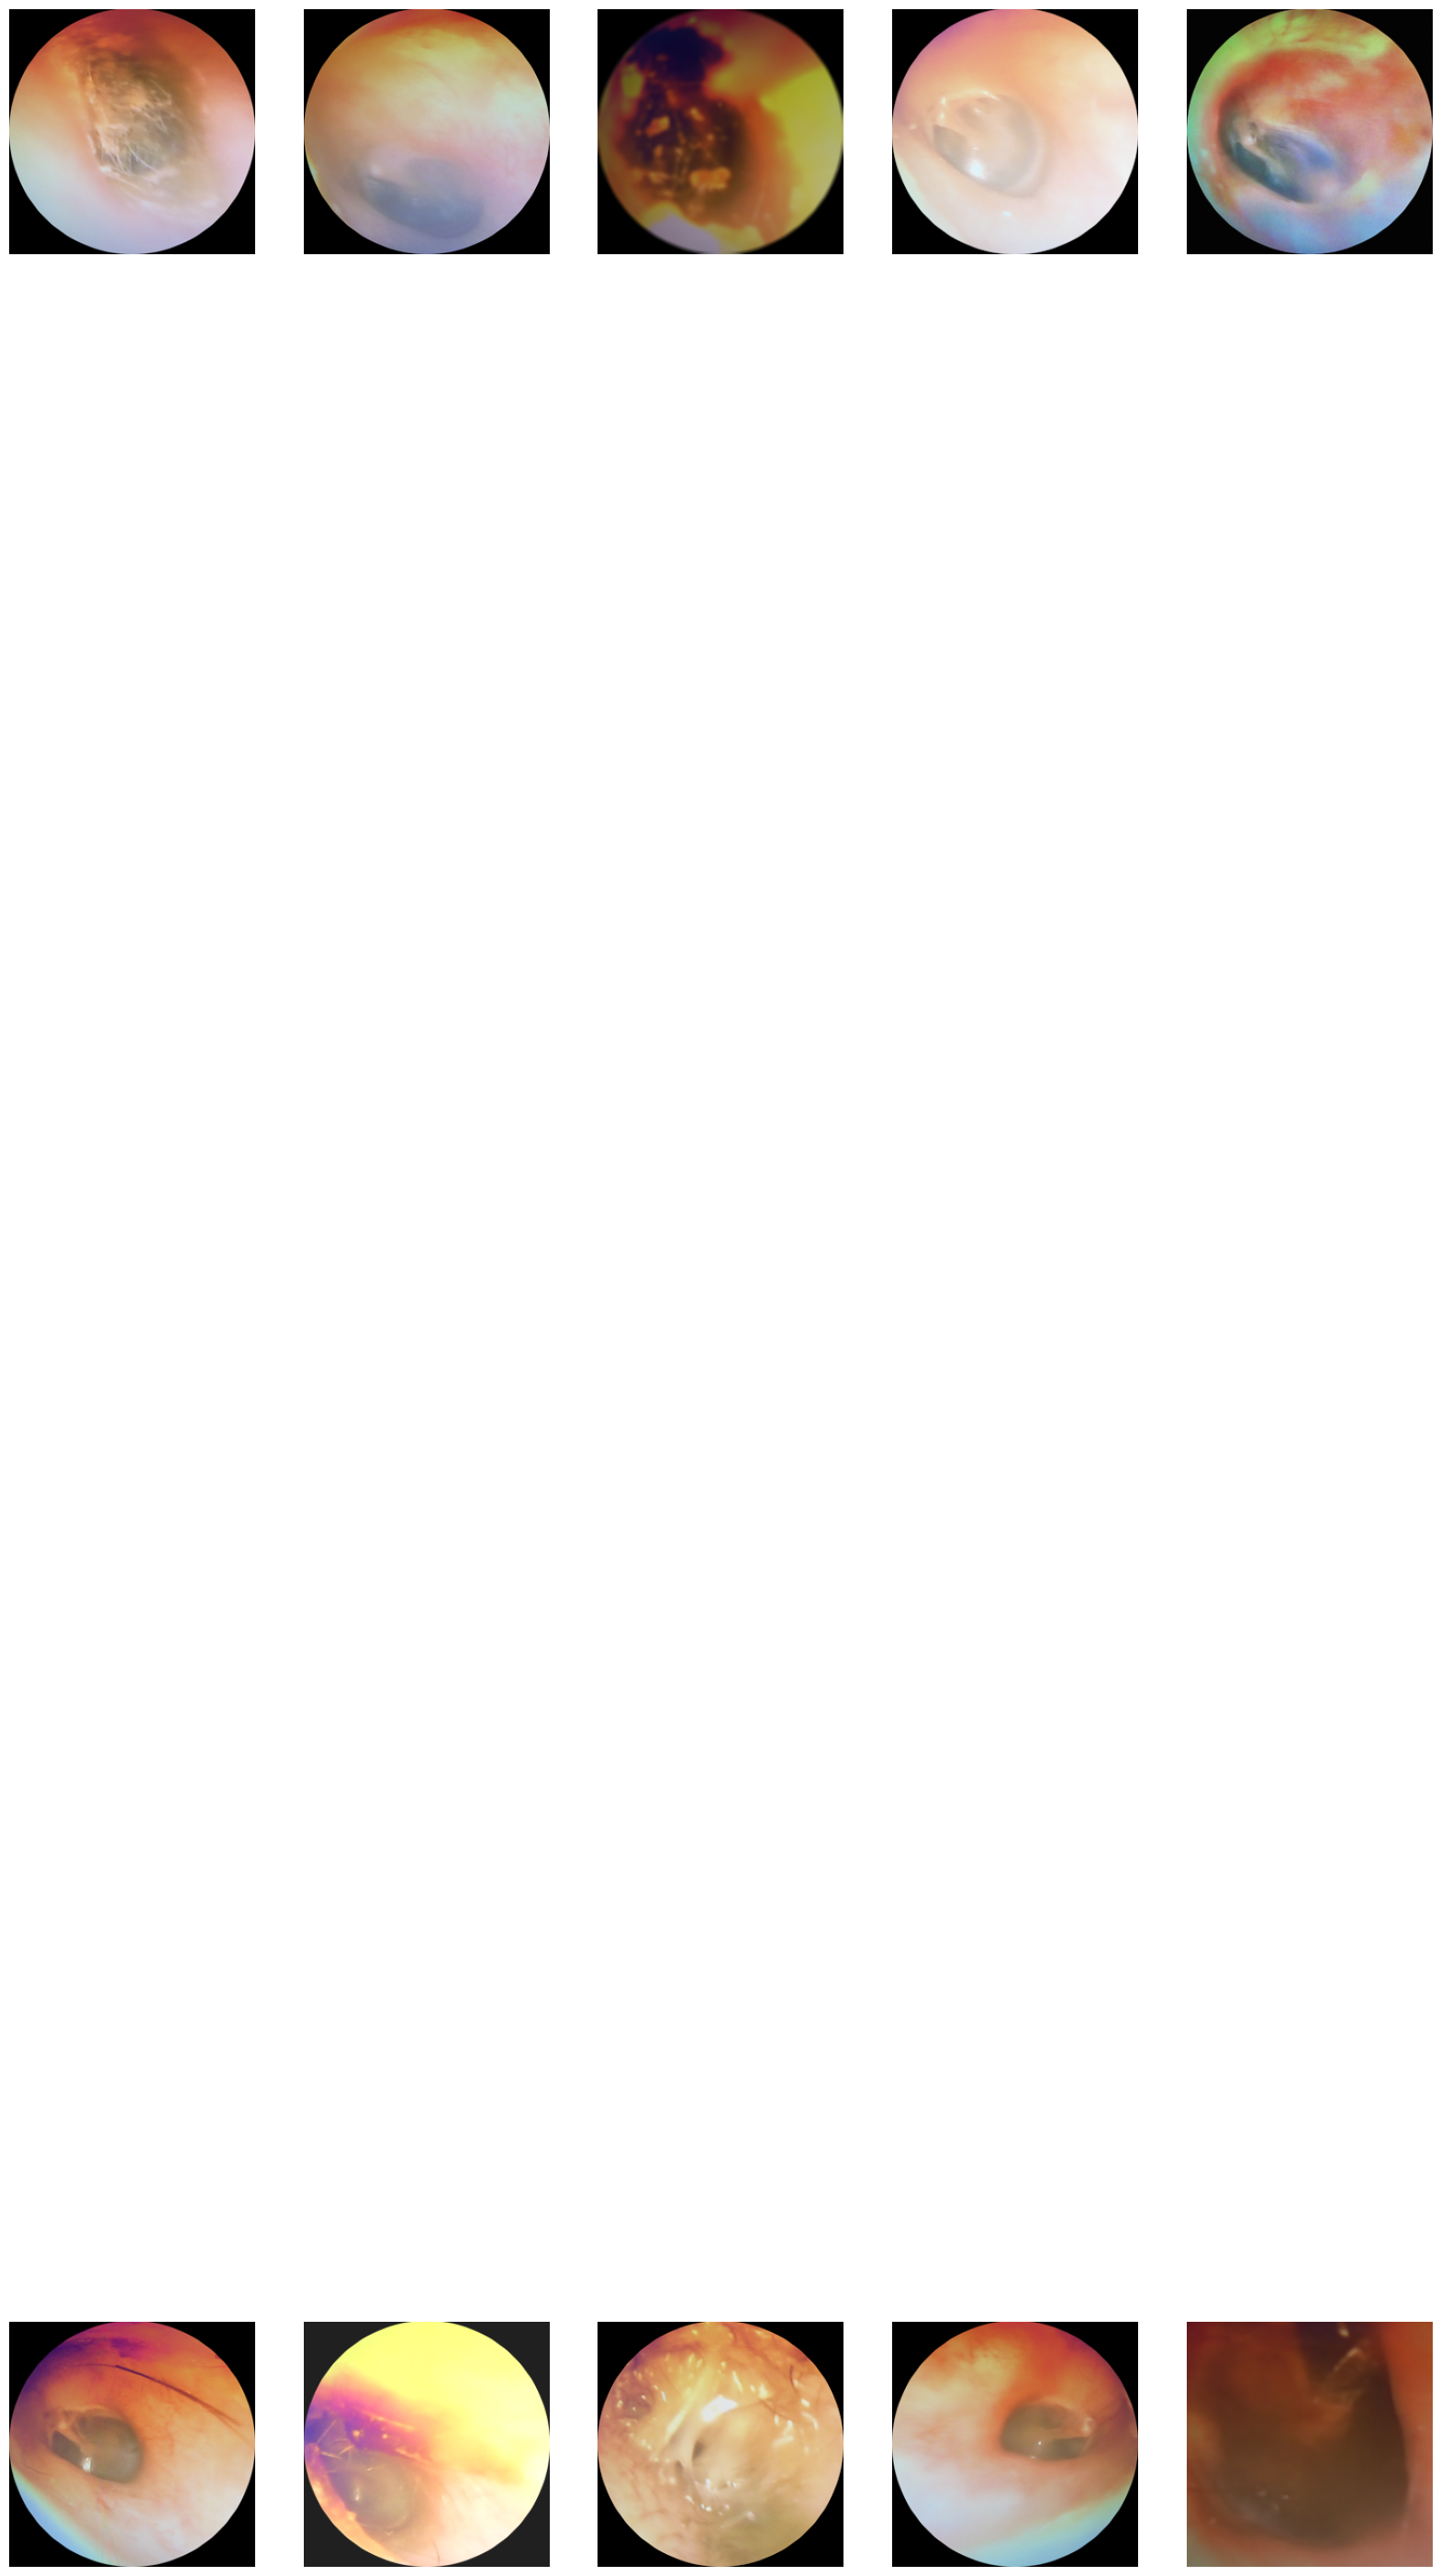

In [40]:
def plot_images(images):
    plt.figure(figsize=(20, 60))
    for i, image in enumerate(images):
        plt.subplot(2, 5, i + 1) 
        plt.imshow(image)
        plt.axis('off')
    plt.show()

shuffled_indices = tf.random.shuffle(tf.range(len(new_x_train)))
shuffled_x_train = tf.gather(new_x_train, shuffled_indices)

final = shuffled_x_train[1500:1510]

plot_images(final)
